In [9]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (24,5)
import seaborn as sns
sns.set()
sns.set(font_scale=1.75)
import scipy

In [14]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000,  2000000,  3000000,  4000000,  5000000,  6000000,  7000000, 8000000, 9000000,
       10000000, 15000000, 20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000]
data = pd.read_csv("results_.csv", header=None)
data.columns = cols[:len(data.columns)]
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
# for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
#     data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)


In [11]:
data.describe()

,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,...,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,15000000,20000000
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,208.500000,281.450000,317.100000,356.350000,410.750000,201.300000,512.40000,207.900000,196.400000,830.700000,...,265.250000,259.400000,293.450000,282.750000,285.150000,310.400000,319.100000,298.950000,310.950000,342.900000
std,235.710014,306.186299,515.459519,590.618879,745.589408,155.490768,1033.47077,139.809984,131.062219,2000.194467,...,198.500133,173.208241,213.128692,189.469307,196.814975,215.833123,217.922463,190.877882,189.732908,212.997628
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,72.000000,110.750000,66.500000,69.250000,75.500000,73.500000,77.50000,77.250000,84.250000,82.750000,...,103.250000,101.250000,106.250000,113.500000,118.000000,132.500000,127.750000,134.500000,150.000000,169.250000
50%,147.500000,234.000000,188.000000,188.500000,185.500000,202.500000,191.00000,229.500000,193.500000,208.500000,...,247.500000,270.000000,284.000000,325.000000,317.000000,319.000000,351.500000,334.000000,360.500000,396.000000
75%,272.500000,275.250000,252.750000,294.500000,300.000000,265.500000,321.25000,314.250000,299.000000,330.250000,...,392.250000,376.750000,405.000000,403.500000,399.250000,467.000000,529.500000,457.500000,463.500000,519.750000
max,1070.000000,1305.000000,2161.000000,2333.000000,2925.000000,587.000000,3970.00000,414.000000,410.000000,7448.000000,...,669.000000,546.000000,675.000000,646.000000,703.000000,730.000000,695.000000,613.000000,615.000000,650.000000


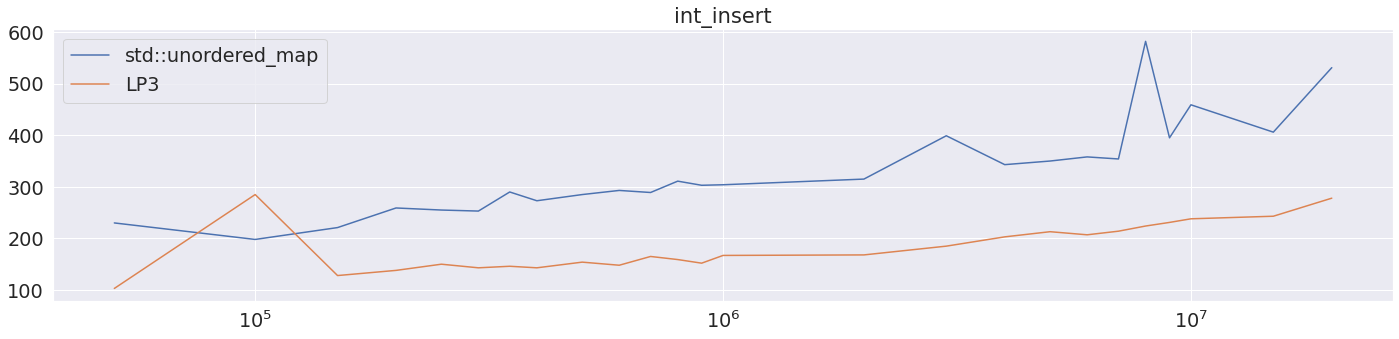

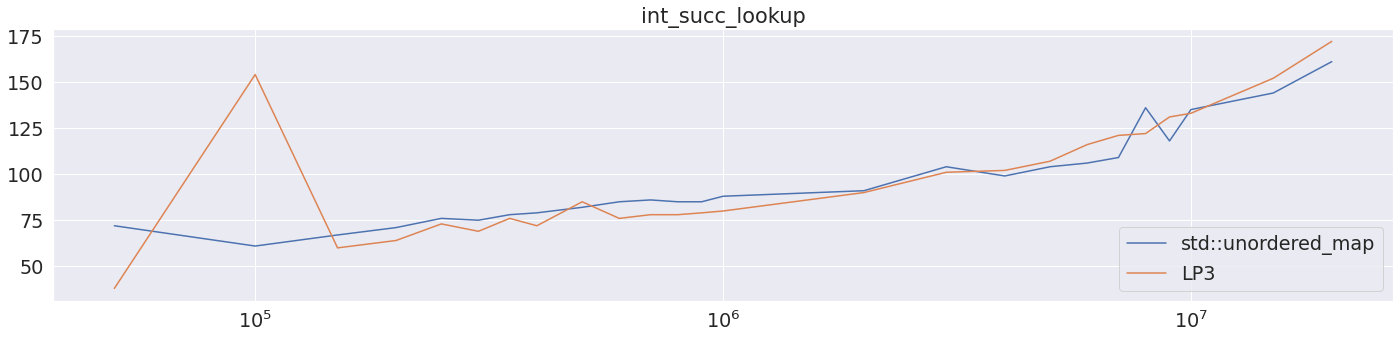

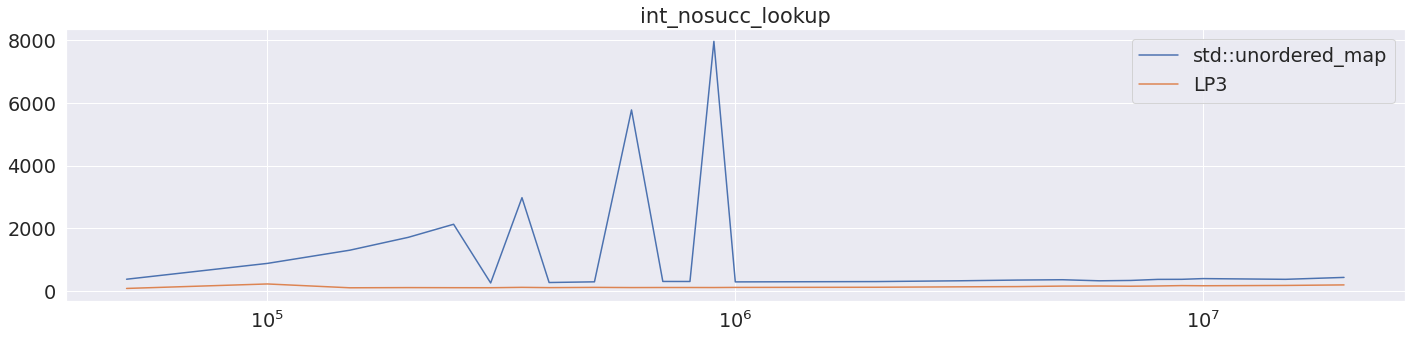

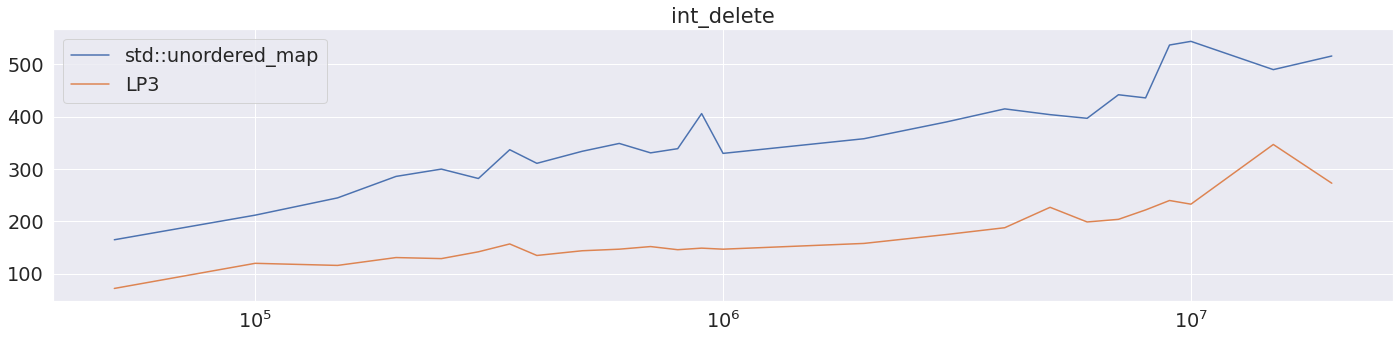

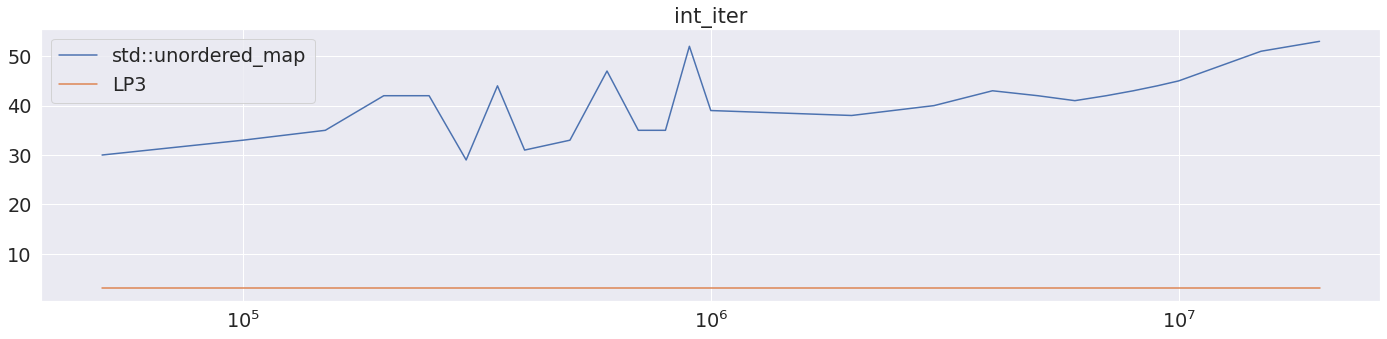

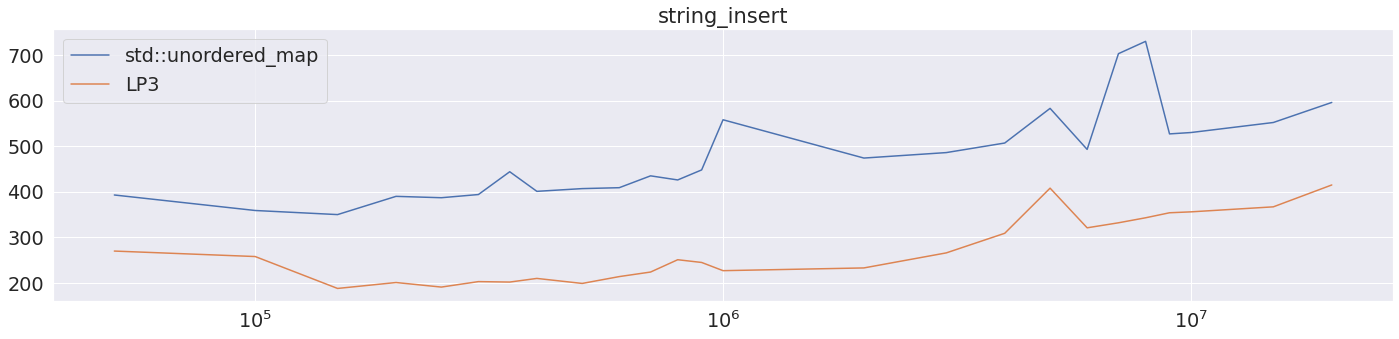

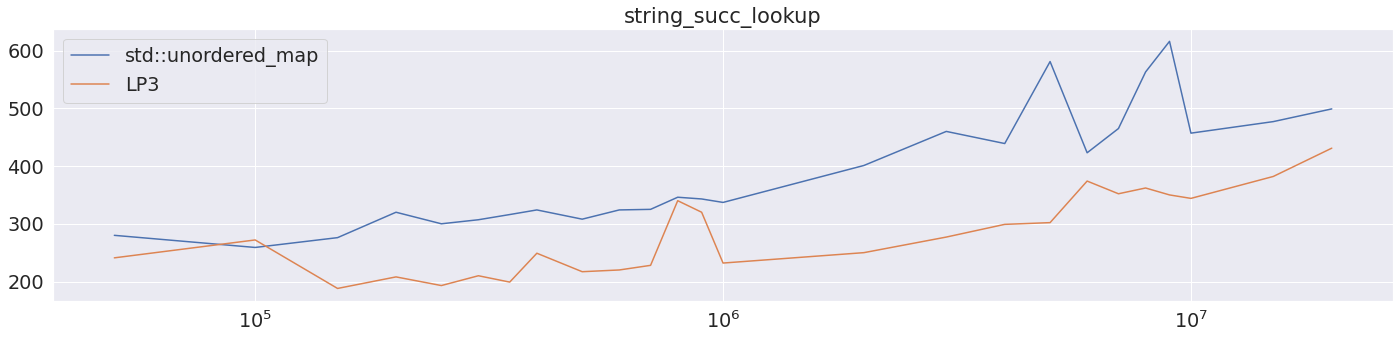

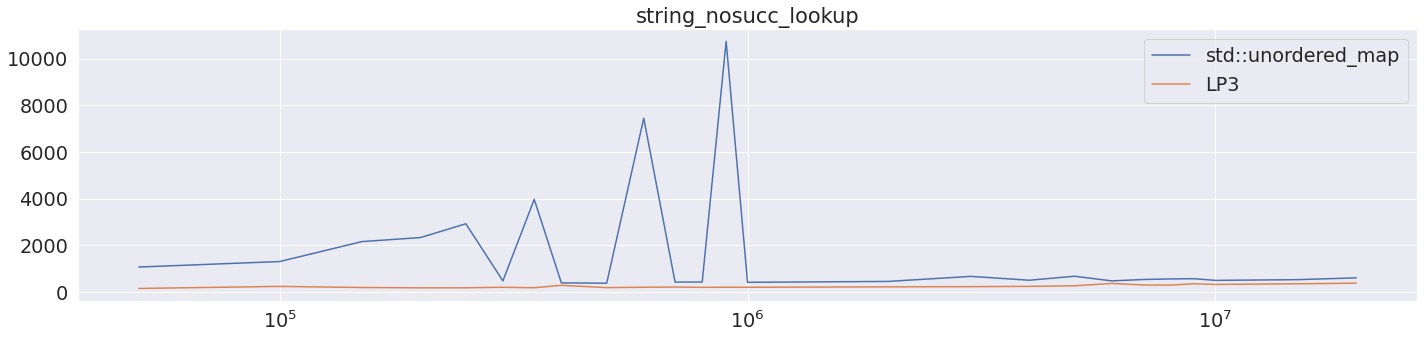

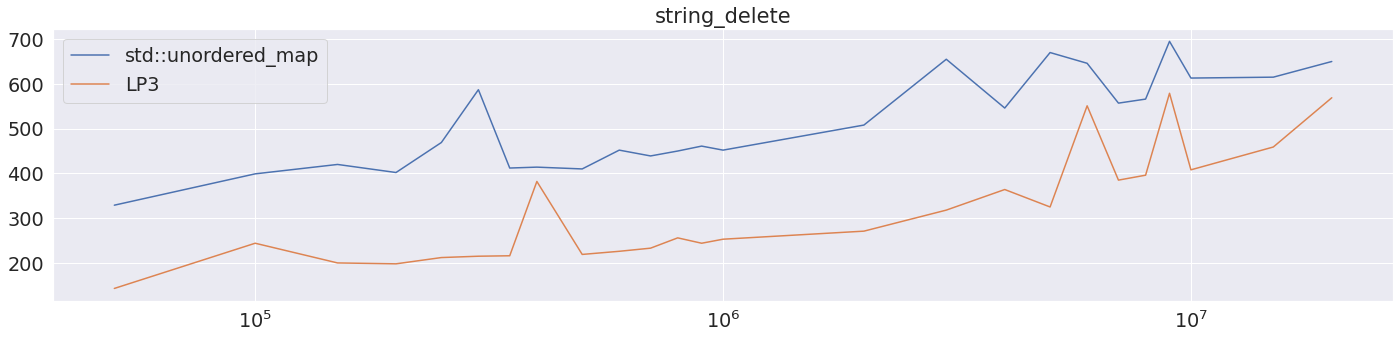

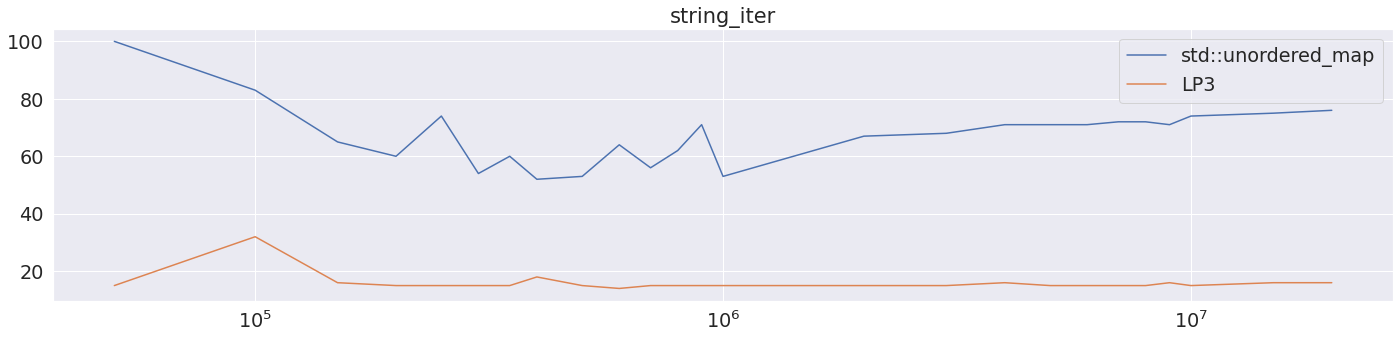

In [16]:
def gen_graph(test):
    badtest= ["int_insert", "string_insert"]
    for m in maps:
        mdata = data_dict[(test,m)].mean()
        sns.lineplot(x=mdata.index, y=mdata, label=m)
    plt.title(test)
    plt.xscale("log")
    plt.show()
    
# print(maps)
for i in tests:
    gen_graph(i)